# Working on Completness & Purity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from matplotlib.patches import Rectangle
from astropy.table import Table
from astropy.io import fits
from astropy.io import ascii
import sys
import pandas as pd
%load_ext autoreload
%autoreload 0
###clevar
import clevar
from clevar import ClCatalog
from clevar.match import ProximityMatch
from clevar.match_metrics import scaling
from clevar.match_metrics import recovery
from clevar.match_metrics import distances
from clevar.match import get_matched_pairs
from clevar.match import output_matched_catalog

In [2]:
outpath = '/pbs/home/n/namourou/test_jupyter/cluster_challenge/notebooks/outfiles_1013/'
plotspath = '/pbs/home/n/namourou/test_jupyter/cluster_challenge/notebooks/plots/amico_plots/'
cdc = ClCatalog.read_full(outpath + 'cdc.fits') #cosmoDC2_small matched table
cam = ClCatalog.read_full(outpath + 'cam.fits') #amico matched table
mt1, mt2 = get_matched_pairs(cdc, cam, 'cross')
c_merged = ClCatalog.read(outpath +'output_catalog.fits', 'merged',  tags = {'z_halo' : 'cat1_z', 'z_amico' : 'cat2_z', 'richness' : 'cat2_richness', 'mass' : 'cat1_mass', 'SN' : 'cat2_SN'})

    * ClEvar used in matching: 0.13.8
    * ClEvar used in matching: 0.13.8


/sps/lsst/users/namourou/conda_clone_210223/descv1.1/clevar/clevar/catalog.py:267: UserWarning: id column missing, additional one is being created.
  warnings.warn(


In [3]:
import sys
sys.path.append('/pbs/home/n/namourou/test_jupyter/cluster_challenge/notebooks/py_functions/')
from completness import *
from purity import *

Completness module charged w 2d func
purity module charged w 2d func


In [7]:
x_bins = np.linspace(0.2,1.2,10)
mbins = [10**13,10**13.5,10**14,10**14.5,10**15]
compl_testf = completness_func1D(c_merged, cdc, x_bins, mbins, x_param = 'z')

0
1
2
3


In [8]:
nbins_x = 9
bin_x = np.empty([nbins_x])
for ix in range(nbins_x):
     bin_x[ix] = 0.5 * (x_bins[ix] + x_bins[ix+1])

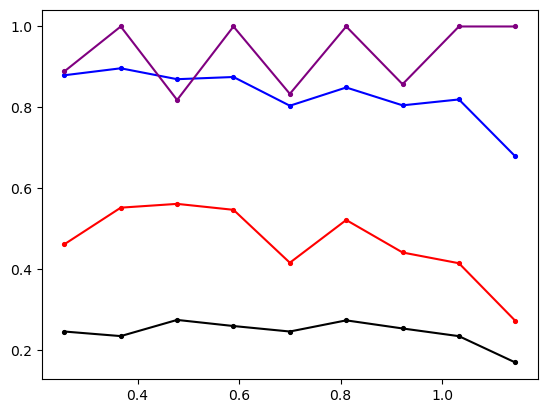

In [9]:
labels=['0.2-0.5','0.5-0.8','0.8-1.0','1.0-1.2']
colors=['black','red','blue','purple']
for i in range(0,4): 
    plt.scatter(bin_x, compl_testf[i], label=labels[i], color=colors[i], marker= ".", s=30)
    plt.plot(bin_x, compl_testf[i], color=colors[i])

In [10]:
x_bins2 = np.linspace(0.2,1.2,16)
y_bins2 = (np.logspace(13,15,20))
compl_testf2d = completness_func2D(c_merged, cdc, x_bins2, y_bins2)

/pbs/home/n/namourou/test_jupyter/cluster_challenge/notebooks/py_functions/completness.py:73: RuntimeWarning: invalid value encountered in divide
  compl_2d = (number_of_match/number_of_halo)


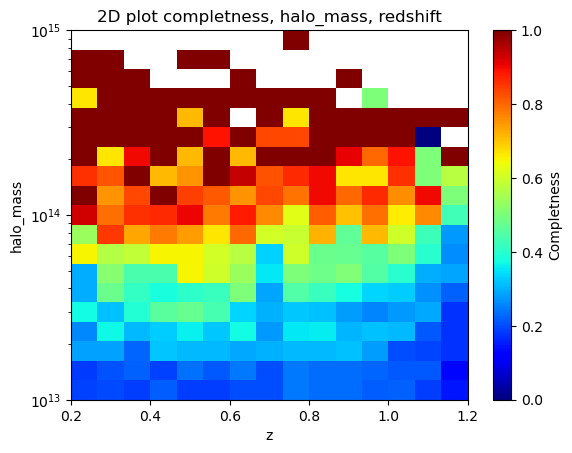

In [11]:
x, y = np.meshgrid(x_bins2, y_bins2)
fig, ax = plt.subplots()
#print(x)
#print(y)
c = ax.pcolormesh(x, y, compl_testf2d.T, cmap='jet', vmin=0, vmax=1)
ax.set_xlim(0.2,1.2)
ax.set_ylim(10**13,10**15)
ax.set_xlabel('z')
ax.set_ylabel('halo_mass')
ax.set_yscale('log')
ax.set_title('2D plot completness, halo_mass, redshift')
fig.colorbar(c, ax=ax, label = 'Completness')
#plt.savefig(plotspath+'2D_comp_plot.png', bbox_inches='tight')

In [11]:
from purity import *
zbins = [0.2,0.5,0.8,1.0,1.15]

In [12]:
x_binsp = np.linspace(1.5,4.5,7)
y_binsp = np.linspace(1,5,10)

In [13]:
purity_t = purity_func1D(c_merged, cam, x_binsp, zbins, 'z')

0
1
2
3


In [14]:
len(purity_t[0])

6

In [15]:
nbins_xp = 6
bin_xp = np.empty([nbins_xp])
for ix in range(nbins_xp):
     bin_xp[ix] = 0.5 * (x_binsp[ix] + x_binsp[ix+1])

In [16]:
 purity_t

array([[7.44186047e-001, 9.13661202e-001, 9.89690722e-001,
        9.82608696e-001, 1.00000000e+000, 1.00000000e+000],
       [7.35440932e-001, 8.29821718e-001, 9.43371943e-001,
        9.88439306e-001, 9.72222222e-001, 1.00000000e+000],
       [6.73913043e-001, 8.00000000e-001, 8.81971466e-001,
        9.69101124e-001, 9.78723404e-001, 1.00000000e+000],
       [5.00000000e-001, 7.46031746e-001, 8.58201058e-001,
        9.39189189e-001, 1.00000000e+000, 1.00000000e+000],
       [6.52970652e-038, 4.66554045e-062, 5.04621343e+180,
        1.94918963e-153, 1.14484251e+243, 2.59903827e-144]])

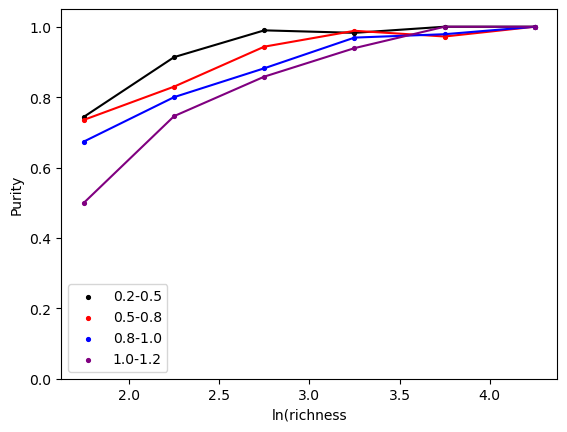

In [17]:
labels=['0.2-0.5','0.5-0.8','0.8-1.0','1.0-1.2']
colors=['black','red','blue','purple']
for i in range(0,4):
    plt.scatter(bin_xp, purity_t[i], label = labels[i], color = colors[i], marker='.',s =30)
    plt.plot(bin_xp, purity_t[i], color = colors[i])
plt.xlabel('ln(richness')
plt.ylabel('Purity')
plt.ylim([0,1.05])
plt.legend()

In [24]:
x_binsp = np.linspace(0.2,1.2,15)
y_binsp = np.linspace(1,5,10)

In [25]:
richbins = [1.5,2.0,2.5,3.0,3.5,4.0,4.5]

In [26]:
purity_t = purity_func1D(c_merged, cam, x_binsp, richbins, 'richness')

0
1
2
3
4
5


In [27]:
nbins_xp = 14
bin_xp = np.empty([nbins_xp])
for ix in range(nbins_xp):
     bin_xp[ix] = 0.5 * (x_binsp[ix] + x_binsp[ix+1])

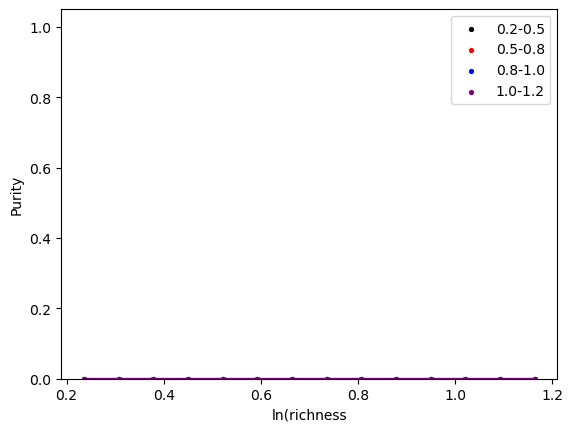

In [28]:
labels=['0.2-0.5','0.5-0.8','0.8-1.0','1.0-1.2']
colors=['black','red','blue','purple']
for i in range(0,4):
    plt.scatter(bin_xp, purity_t[i], label = labels[i], color = colors[i], marker='.',s =30)
    plt.plot(bin_xp, purity_t[i], color = colors[i])
plt.xlabel('ln(richness')
plt.ylabel('Purity')
plt.ylim([0,1.05])
plt.legend()